<a href="https://colab.research.google.com/github/siming-deng/micro_cred_winter_2022/blob/main/Boston_Housing_Linear_Regression_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.Open-source ML library for Python. Built on NumPy, SciPy, and Matplotlib. ... Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms.

# Task 1 : Environment Set up

In [1]:
#import required libraries
import numpy as np
import pandas as pd

# Task 2 : Data Collection

In [2]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
df_boston.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [4]:
# display the data frame
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
# target: prices of the house
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
# append Price, target, as a new columnn to the dataset
# Price is the median value of owner-occupied homes in $1000s
df_boston['Price'] = boston_dataset.target

In [7]:
# print top 5 observations
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We want first to check to see if we have missing data ,we use isnull().sum()

In [8]:
#sum to count of the NaN values For each column
df_boston.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [9]:
# mean value of the Price
df_boston["Price"].mean()

22.532806324110698

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [10]:
# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


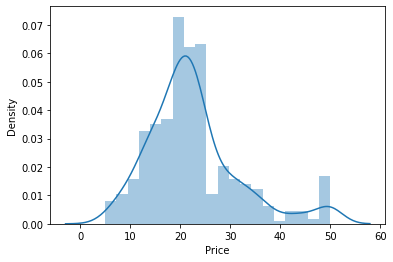

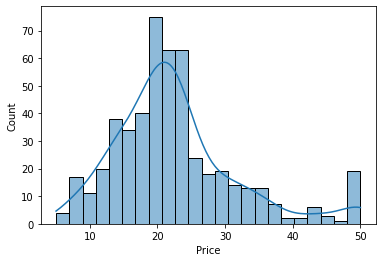

In [11]:
#sns.set(rc={'figure.figsize':(12,12)})#. rc parameter set aesthetics of your plots 
# set figure size by passing dictionary to rc parameter with key 'figure.figsize' in seaborn set method:
sns.distplot(df_boston['Price'], bins=20)
plt.show()
sns.histplot(df_boston['Price'], kde = True)
plt.show()

#  Create a correlation matrix that measures the linear relationships between the variables
# A perfect negative correlation is represented by the value -1.0, while a 0 indicates no correlation, and +1.0 indicates a perfect positive correlation. A perfect negative correlation means the relationship that exists between two variables is exactly opposite all of the time.


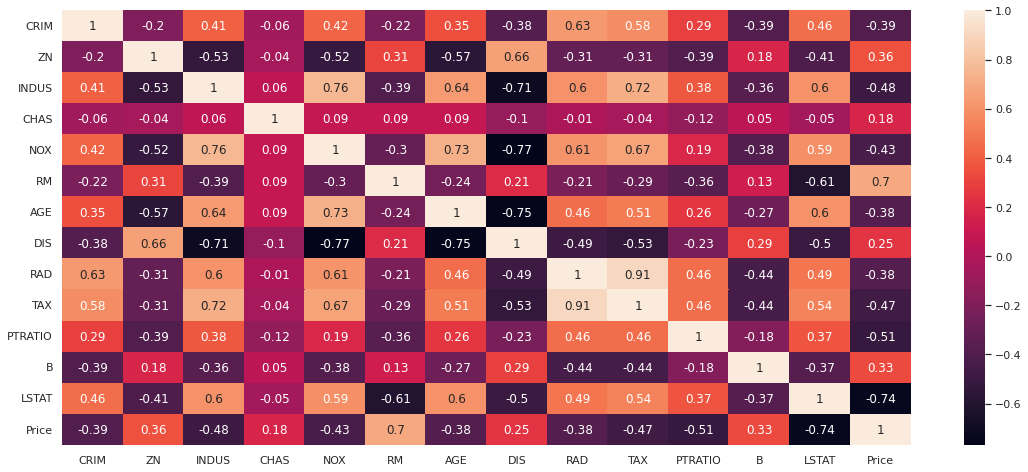

In [31]:
correlation_matrix = df_boston.corr().round(2)
#A correlation matrix is a table showing correlation coefficients between variables.
# annot = True to print the values inside the square
# put the numbers on
sns.heatmap(data=correlation_matrix,annot=True)
sns.set(rc = {'figure.figsize':(19,8)})

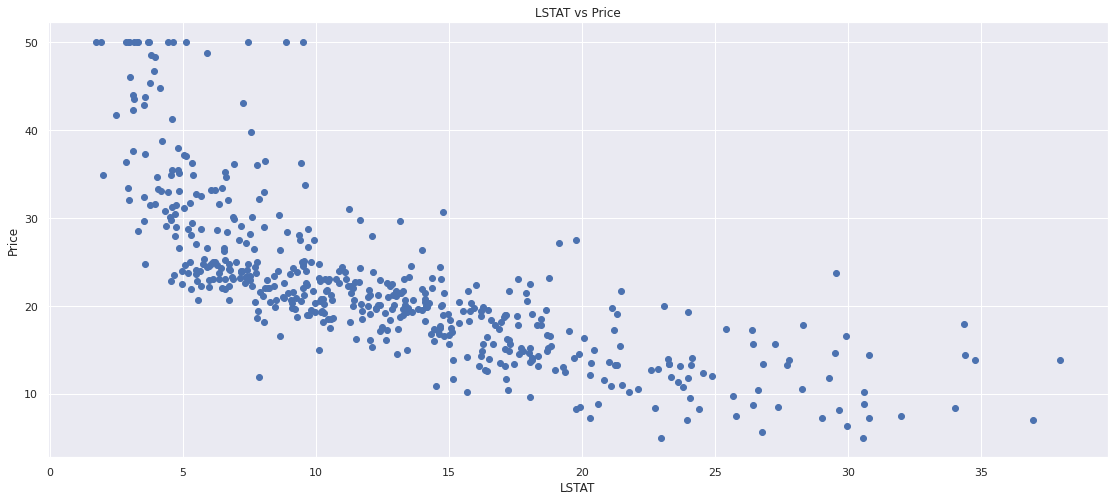

In [13]:
# scatter plot showing LSTAT vs Price
plt.scatter(df_boston['LSTAT'], df_boston['Price'])
plt.title('LSTAT vs Price')
plt.xlabel('LSTAT')
plt.ylabel('Price')
plt.show()

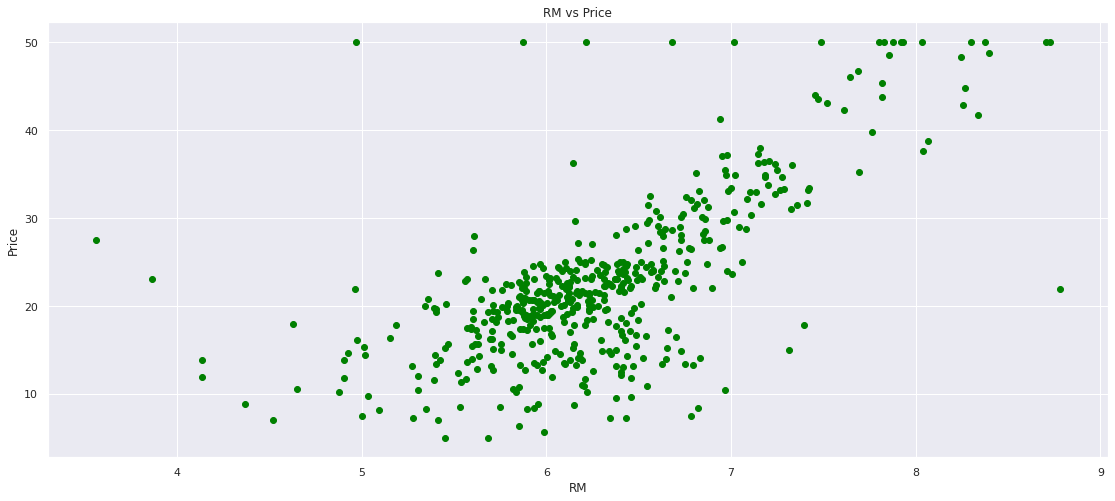

In [14]:
# scatter plot showing RM vs Price
plt.scatter(df_boston['RM'], df_boston['Price'], color = 'green')
plt.title('RM vs Price')
plt.xlabel('RM')
plt.ylabel('Price')
plt.show()

# Write Your Observations

1) Based on the normal distribution plot and the histogram for Boston Housing Prices, it is shown that most of the houses in Boston have prices around 20 thousand dollars. 

2) Based on the correlation matrix shown by the heatmap, TAX—full value property tax rate per $10,000—and RAD—index of accessibility to radial highways—have the strongest positive correlation coefficient of 0.91, which indicates that they have a very strong positive relationship between these two variables. In other words, when there is an increase in the property tax rate, the index of accessibility to radial highways will also increase.

3) On the other hand, NOX—nitric oxide concentration (parts per 10 million)—and DIS—weighted distances to five Boston employment centers—have the strongest negative correlation coefficient of -0.77, which indicates that they have a pretty strong negative relationship between these two variables. In other words, when there is an increase in nitric oxide concentration, the weighted distances to five Boston employment centers will be decreasing.

4) Since we want to predict the prices for Boston houses based on different factors, the correlation matrix shows a relatively strong negative correlation coefficient of -0.74 between price—Median value of owner-occupied homes in $1000s—and LSTAT—Percentage of the lower status population, which indicates that they have a strong positive relationship. If there is an increase in the housing price, the percentage of the lower status population is likely to decrease, since only rich people are affordable with higher home prices. However, the price has a strong positive correlation coefficient of 0.7 with RM—the average number of rooms per dwelling, indicating a strong positive relationship between these two variables. If there is an increase in the housing price, the average number of rooms per dwelling is likely to increase as well, which makes intuitive sense.

# Preparing the data for training the Machine Learning Model

In [15]:
# assign features on X axis 
# data: contains the information for various houses
X_features = boston_dataset.data

In [16]:
# assign target on Y axis 
Y_target = boston_dataset.target

# Build Linear Regression Model

In [17]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [18]:
# fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression()

In [19]:
# The simple linear regression model is essentially a linear equation of the form y = c + b*x; 
# where y is the dependent variable (outcome), x is the independent variable (predictor), b is the slope of the line;
# also known as regression coefficient and c is the intercept; labeled as constant.
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 36.46 


In [20]:
#The Regression Coefficient is the constant 'b' in the regression equation 
#that tells about the change in the value of dependent variable corresponding to the unit change in 
#the independent variable.y = -3.6 + 5.0X 1 - 1.8X 2, the variables X 1 and X 2 are multiplied by 5.0 and -1.8, 
#respectively, so the coefficients are 5.0 and -1.8
# print the coefficient 
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 13 


# Model Training

Notes: random_state as the name suggests, is used for initializing the internal random number generator. This is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.

In [21]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target, train_size=0.80, test_size = 0.2, random_state=15)

In [22]:
# print the dataset shape
print(boston_dataset.data.shape)

(506, 13)


In [23]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(404, 13) (102, 13) (404,) (102,)


In [24]:
# fit the training sets into the model
lineReg.fit(X_train,Y_train)

LinearRegression()

# Caluclate RMSE and R Square:

# RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

# R Square

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination,the higher r means ,the higher percentage of points the line passes through when the data points and line are plotted. If the coefficient is 0.80, then 80% of the points should fall within the regression line.The usefulness of R2 is its ability to find the likelihood of future events falling within the predicted outcomes. 


https://drive.google.com/file/d/1YPzOS2dbKIuVOuYWhCeP9HOs0WcWxGaK/view?usp=sharing


In [25]:
# import libraries for rmse and r2
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# predict the training set
y_train_predict = lineReg.predict(X_train)

In [27]:
# calculate the rmse for the training set
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))

In [28]:
#The usefulness of R2 is its ability to find the likelihood of future
# events falling within the predicted outcomes.
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
#RMSE is a measure of how spread out these residuals are.
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6767075260099835
R2 score is 0.7455344405641732




In [29]:
# model evaluation for testing set
y_test_predict = lineReg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)

print('The model performance for testing set')
print('-------------------------------------')
print(f'RMSE is {rmse_test}')
print(f'R2 score is {r2_test}')

The model performance for testing set
-------------------------------------
RMSE is 4.879779243478213
R2 score is 0.6920749038652128


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


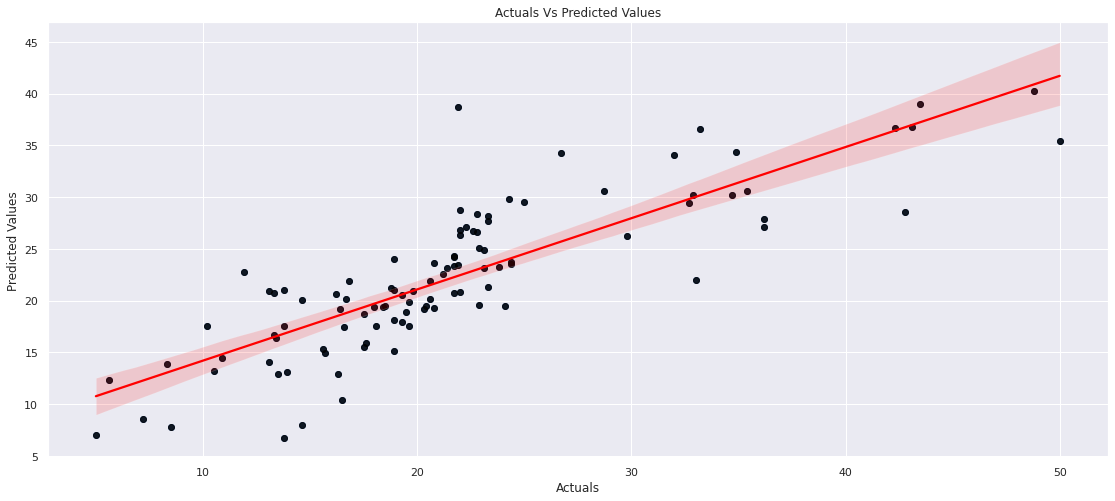

In [30]:
# plotting the y_test vs y_pred
# ideally should have been a straight line

plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
scatter=plt.scatter(Y_test, y_test_predict)
regplot=sns.regplot(Y_test, y_test_predict,x="Y_test", y="y_test_predict", data=scatter,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})
sns.set(rc = {'figure.figsize':(19,8)})

# Your Conclusion 

1) According to the linear regression model, the model performance for the training set has RMSE of 4.68 and R square of 0.75. The model performance for the testing set has an RMSE of 4.88 and an R square of 0.69. The performance for the testing result is lower than the performance of the training result since testing RMSE is bigger than training RMSE and testing R square is smaller than training R square.


2) The linear regression model is trying to predict the price of Boston houses, the model can have an R square of 0.69, which means that based on the independent variables (factors), 69% of the variance in the dependent variable (price) are explained by the model. The scatter plot of the actuals vs predicted values also shows the result.